Limpieza de datos para predicción del APGAR a los 5 minutos.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. INTEGRACIÓN

In [7]:
df = pd.read_csv("Nacimientos_ocurridos_en_el_Hospital_General_de_Medell_n_20250517.csv", encoding='latin1')

In [8]:
df.head()


,ANO,PERIODO DE REPORTE,SEXO,PESO (Gramos),TALLA (CentImetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,...,MUNICIPIO RESIDENCIA,AREA RESIDENCIA,LOCALIDAD,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,REGIMEN SEGURIDAD,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,PROFESION CERTIFICADOR
0,2022,1,FEMENINO,2341.0,44.0,01/01/2022 12:00:00 AM,MEDICO,37.0,7,ESPONTANEO,...,BELLO,CABECERA MUNICIPAL,COMUNA 01,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,22.0,BASICA SECUNDARIA,MEDICO
1,2022,1,MASCULINO,3750.0,51.0,01/01/2022 12:00:00 AM,MEDICO,40.0,7,ESPONTANEO,...,ANORI,RURAL DISPERSO,SIN INFORMACION,2,4,SUBSIDIADO,SAVIA SALUD E.P.S.,20.0,MEDIA ACADEMICA O CLASICA,MEDICO
2,2022,1,MASCULINO,3527.0,51.0,01/01/2022 12:00:00 AM,MEDICO,38.0,7,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,SAN JAVIER,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,50.0,MEDIA ACADEMICA O CLASICA,MEDICO
3,2022,1,FEMENINO,2745.0,47.0,01/01/2022 12:00:00 AM,MEDICO,38.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,MANRIQUE,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,32.0,MEDIA ACADEMICA O CLASICA,MEDICO
4,2022,1,FEMENINO,2315.0,43.0,01/01/2022 12:00:00 AM,MEDICO,35.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,VILLA HERMOSA,3,5,SUBSIDIADO,SAVIA SALUD E.P.S.,27.0,BASICA SECUNDARIA,MEDICO


2. SELECCIÓN DE VARIABLES

In [9]:
print("\nColumnas disponibles en el dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Columnas disponibles en el dataset:
1. ANO
2. PERIODO DE REPORTE
3. SEXO
4. PESO (Gramos)
5. TALLA (CentImetros)
6. FECHA NACIMIENTO
7. PARTO ATENDIDO POR
8. TIEMPO DE GESTACION
9. NUMERO CONSULTAS PRENATALES
10. TIPO PARTO
11. MULTIPLICIDAD EMBARAZO
12. APGAR1
13. APGAR2
14. GRUPO SANGUINEO
15. FACTOR RH
16. PERTENENCIA ETNICA
17. EDAD MADRE
18. ESTADO CONYUGAL MADRE
19. NIVEL EDUCATIVO MADRE
20. ULTIMO ANO APROBADO MADRE
21. PAIS RESIDENCIA
22. DEPARTAMENTO RESIDENCIA
23. MUNICIPIO RESIDENCIA
24. AREA RESIDENCIA
25. LOCALIDAD
26. NUMERO HIJOS NACIDOS VIVOS
27. NUMERO EMBARAZOS
28. REGIMEN SEGURIDAD
29. NOMBRE ADMINISTRADORA
30. EDAD PADRE
31. NIVEL EDUCATIVO PADRE
32. PROFESION CERTIFICADOR


In [10]:
# Variables relevantes para la predicción del APGAR2
relevant_columns = [
    'SEXO', 'PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO',
    'APGAR1', 'APGAR2', 'EDAD MADRE', 
    'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS'
]

In [11]:
# Crear un subconjunto del dataframe con las variables seleccionadas
df_relevantes = df[relevant_columns].copy()
print(f"\nVariables seleccionadas: {len(relevant_columns)}")




Variables seleccionadas: 12


In [12]:
df_relevantes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10038 entries, 0 to 10037
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEXO                         10038 non-null  object 
 1   PESO (Gramos)                10037 non-null  float64
 2   TALLA (CentImetros)          10037 non-null  float64
 3   TIEMPO DE GESTACION          10031 non-null  float64
 4   NUMERO CONSULTAS PRENATALES  10038 non-null  int64  
 5   TIPO PARTO                   10038 non-null  object 
 6   MULTIPLICIDAD EMBARAZO       10038 non-null  object 
 7   APGAR1                       10016 non-null  float64
 8   APGAR2                       10016 non-null  float64
 9   EDAD MADRE                   10038 non-null  int64  
 10  NUMERO HIJOS NACIDOS VIVOS   10038 non-null  int64  
 11  NUMERO EMBARAZOS             10038 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 941.2+ KB


In [13]:
#Corrección del tipo de datos object a categorías
df_relevantes['SEXO'] = df_relevantes['SEXO'].astype('category')
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].astype('category')
df_relevantes['MULTIPLICIDAD EMBARAZO'] = df_relevantes['MULTIPLICIDAD EMBARAZO'].astype('category')



3. DESCRIPCIÓN ESTADÍSTICA

Estadísticas descriptivas para variables numéricas:

In [14]:
df_relevantes.describe()


,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
count,10037.000000,10037.000000,10031.000000,10038.000000,10016.000000,10016.000000,10038.000000,10038.000000,10038.000000
mean,2928.234831,47.495566,37.877380,6.574019,9.185603,9.533646,25.180116,1.899283,2.129906
std,570.643351,3.015026,2.225995,3.043710,1.156197,0.891109,6.403586,1.189823,1.385409
min,430.000000,27.000000,24.000000,0.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,2620.000000,46.000000,37.000000,5.000000,9.000000,9.000000,20.000000,1.000000,1.000000
50%,2987.000000,48.000000,38.000000,7.000000,9.000000,10.000000,24.000000,2.000000,2.000000
75%,3304.000000,49.000000,39.000000,8.000000,10.000000,10.000000,29.000000,2.000000,3.000000
max,5200.000000,57.000000,42.000000,24.000000,10.000000,10.000000,47.000000,13.000000,14.000000


Análisis de variables categóricas

SEXO
MASCULINO        5077
FEMENINO         4960
INDETERMINADO       1
Name: count, dtype: int64


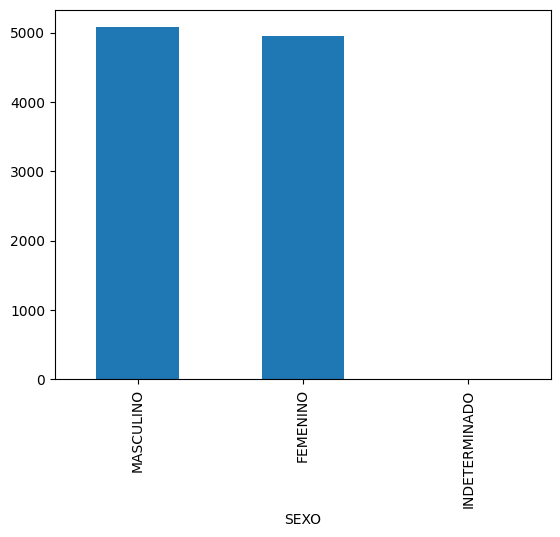

In [15]:
df_relevantes['SEXO'].value_counts().plot(kind='bar')
print(df_relevantes['SEXO'].value_counts())


<Axes: xlabel='TIPO PARTO'>

C:\Users\alexa\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\alexa\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


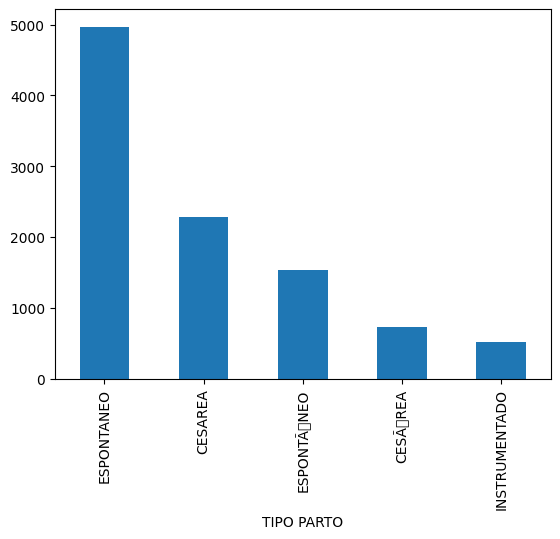

In [16]:
df_relevantes['TIPO PARTO'].value_counts().plot(kind='bar')


In [17]:
df_relevantes['TIPO PARTO'].unique()

['ESPONTANEO', 'CESAREA', 'INSTRUMENTADO', 'ESPONTÃNEO', 'CESÃREA']
Categories (5, object): ['CESAREA', 'CESÃREA', 'ESPONTANEO', 'ESPONTÃNEO', 'INSTRUMENTADO']

In [18]:
#Poner 'ESPONTÃNEO' en 'ESPONTANEO'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')

#Poner 'CESÃREA' en 'CESAREA'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')

C:\Users\alexa\AppData\Local\Temp\ipykernel_3192\1847319756.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')
C:\Users\alexa\AppData\Local\Temp\ipykernel_3192\1847319756.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')


MULTIPLICIDAD EMBARAZO
SIMPLE    9733
DOBLE      296
TRIPLE       9
Name: count, dtype: int64


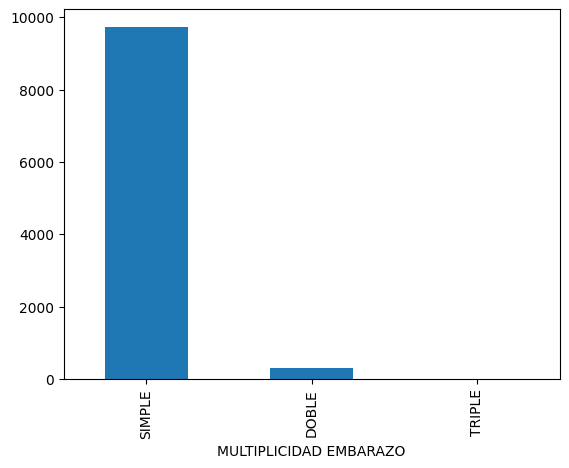

In [19]:
df_relevantes['MULTIPLICIDAD EMBARAZO'].value_counts().plot(kind='bar')
print(df_relevantes['MULTIPLICIDAD EMBARAZO'].value_counts())


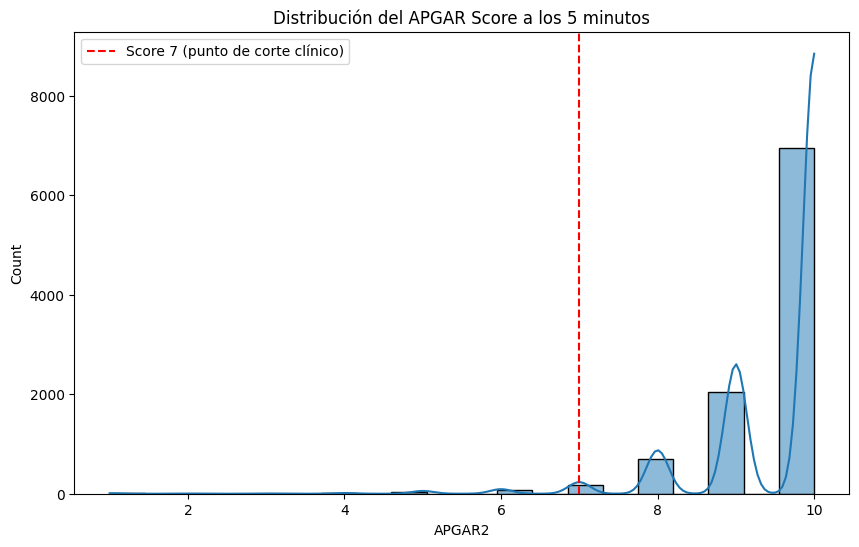

In [20]:
# Visualización de la distribución del APGAR score a los 5 minutos
plt.figure(figsize=(10, 6))
sns.histplot(df_relevantes['APGAR2'].dropna(), kde=True, bins=20)
plt.title('Distribución del APGAR Score a los 5 minutos')
plt.axvline(x=7, color='r', linestyle='--', label='Score 7 (punto de corte clínico)')
plt.legend()
plt.savefig('apgar2_distribucion.png')

4. LIMPIEZA DE ATÍPICOS

In [21]:
numeric_cols = df_relevantes.select_dtypes(include=[np.number]).columns
print(f"\nVariables numéricas para análisis de atípicos: {numeric_cols.tolist()}")


Variables numéricas para análisis de atípicos: ['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION', 'NUMERO CONSULTAS PRENATALES', 'APGAR1', 'APGAR2', 'EDAD MADRE', 'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS']


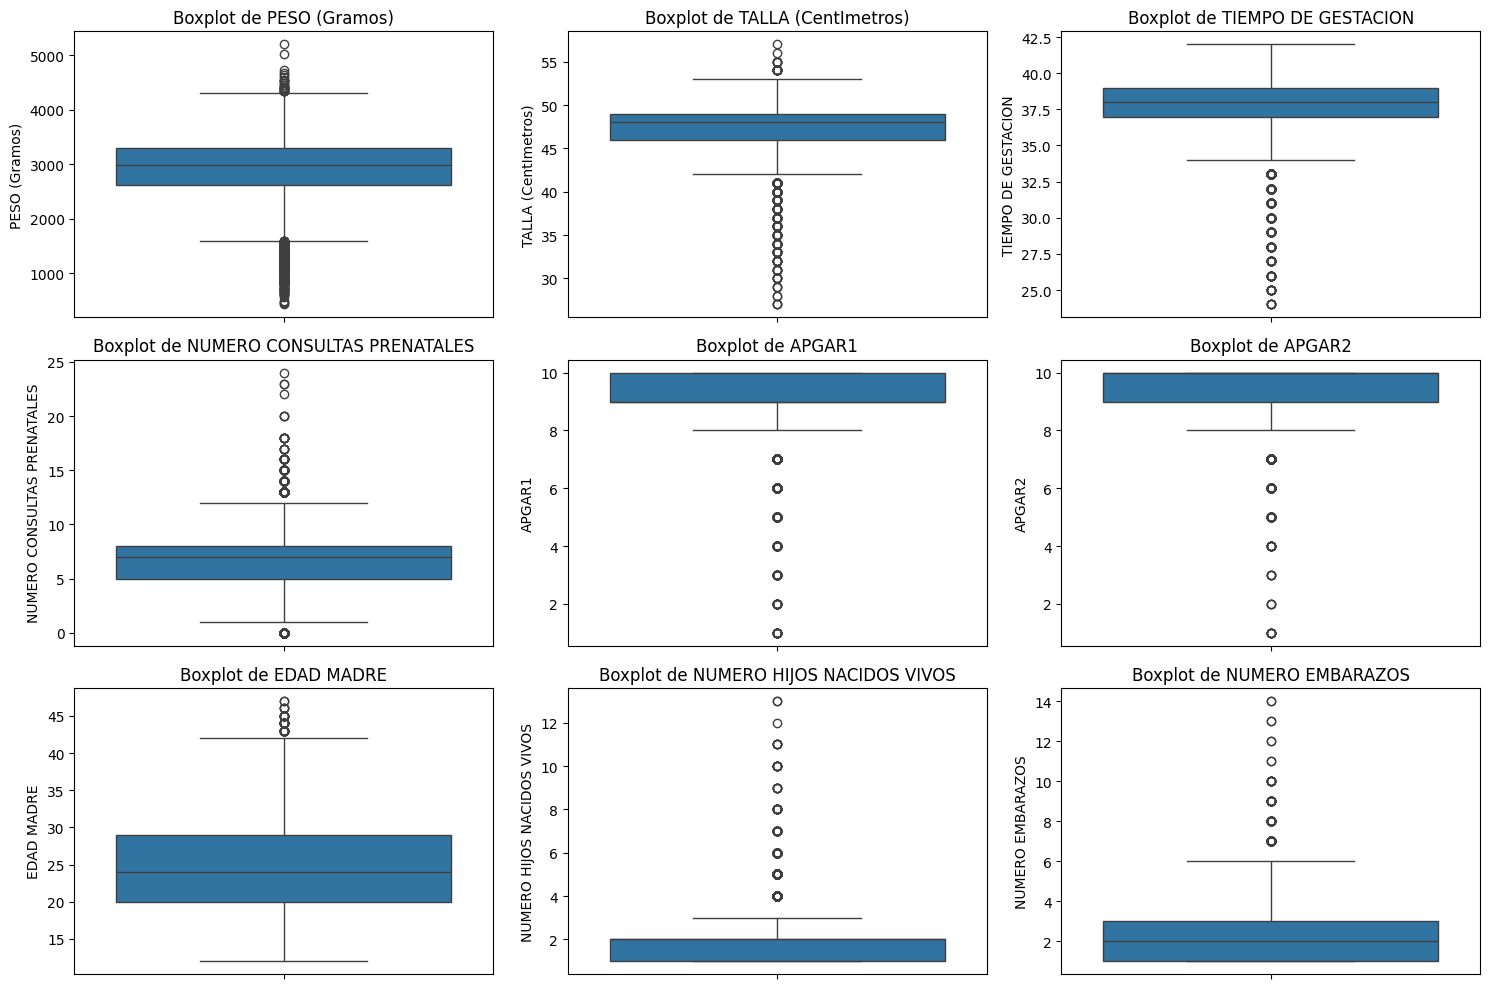

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_relevantes[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.savefig('boxplots_variables_numericas.png')

In [23]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers, lower_bound, upper_bound

In [24]:
for col in ['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION', 'EDAD MADRE']:
    outliers, lb, ub = detect_outliers_iqr(df_relevantes, col)
    print(f"\nOutliers en {col}:")
    print(f"Límite inferior: {lb:.2f}, Límite superior: {ub:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    if len(outliers) > 0 and len(outliers) < 10:
        print("Ejemplos de outliers:")
        print(outliers.head())


Outliers en PESO (Gramos):
Límite inferior: 1594.00, Límite superior: 4330.00
Número de outliers: 284

Outliers en TALLA (CentImetros):
Límite inferior: 41.50, Límite superior: 53.50
Número de outliers: 402

Outliers en TIEMPO DE GESTACION:
Límite inferior: 34.00, Límite superior: 42.00
Número de outliers: 422

Outliers en EDAD MADRE:
Límite inferior: 6.50, Límite superior: 42.50
Número de outliers: 66


5. LIMPIEZA DE NULOS

In [26]:
# Verificar valores nulos
df_relevantes.isnull().sum()


SEXO                            0
PESO (Gramos)                   1
TALLA (CentImetros)             1
TIEMPO DE GESTACION             7
NUMERO CONSULTAS PRENATALES     0
TIPO PARTO                      0
MULTIPLICIDAD EMBARAZO          0
APGAR1                         22
APGAR2                         22
EDAD MADRE                      0
NUMERO HIJOS NACIDOS VIVOS      0
NUMERO EMBARAZOS                0
dtype: int64

In [ ]:
6. CREACIÓN DE NUEVAS VARIABLES

In [27]:
df_relevantes = pd.get_dummies(df_relevantes, columns=['SEXO', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO'], drop_first=False) 
df_relevantes.head()


,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,SEXO_FEMENINO,SEXO_INDETERMINADO,SEXO_MASCULINO,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE
0,2341.0,44.0,37.0,7,9.0,10.0,18,1,1,True,False,False,False,True,False,False,True,False
1,3750.0,51.0,40.0,7,9.0,10.0,23,2,4,False,False,True,False,True,False,False,True,False
2,3527.0,51.0,38.0,7,9.0,10.0,25,1,1,False,False,True,False,True,False,False,True,False
3,2745.0,47.0,38.0,4,9.0,10.0,26,1,1,True,False,False,False,True,False,False,True,False
4,2315.0,43.0,35.0,4,9.0,10.0,31,3,5,True,False,False,False,True,False,False,True,False


7. ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

In [28]:
df_relevantes.corr()


,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,SEXO_FEMENINO,SEXO_INDETERMINADO,SEXO_MASCULINO,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE
PESO (Gramos),1.000000,0.870450,0.758864,0.170102,0.243926,0.263795,0.031038,0.008427,0.023316,-0.071170,-0.005462,0.071279,-0.109051,0.062450,0.091049,-0.227462,0.230047,-0.033625
TALLA (CentImetros),0.870450,1.000000,0.763564,0.154759,0.254254,0.273132,0.007052,-0.009818,-0.001890,-0.090456,-0.018195,0.090819,-0.168241,0.113121,0.104286,-0.202503,0.205064,-0.031422
TIEMPO DE GESTACION,0.758864,0.763564,1.000000,0.167403,0.311745,0.340251,-0.027814,-0.050379,-0.046058,0.007341,-0.008422,-0.007173,-0.152242,0.104058,0.090714,-0.217999,0.221874,-0.040234
NUMERO CONSULTAS PRENATALES,0.170102,0.154759,0.167403,1.000000,0.072880,0.079687,0.104281,-0.143517,-0.108887,0.014525,0.001397,-0.014553,0.008920,-0.025769,0.037116,-0.016622,0.017940,-0.008931
APGAR1,0.243926,0.254254,0.311745,0.072880,1.000000,0.796531,-0.014626,0.001490,0.001194,0.021367,-0.010247,-0.021162,-0.130556,0.154115,-0.062073,-0.082107,0.085285,-0.024989
APGAR2,0.263795,0.273132,0.340251,0.079687,0.796531,1.000000,-0.016381,0.003476,0.005522,0.010948,-0.017199,-0.010604,-0.148874,0.176895,-0.073277,-0.085772,0.088322,-0.021700
EDAD MADRE,0.031038,0.007052,-0.027814,0.104281,-0.014626,-0.016381,1.000000,0.532226,0.547966,0.012685,-0.011193,-0.012461,0.158343,-0.132281,-0.042472,0.034366,-0.040522,0.038143
NUMERO HIJOS NACIDOS VIVOS,0.008427,-0.009818,-0.050379,-0.143517,0.001490,0.003476,0.532226,1.000000,0.878296,0.005955,-0.007545,-0.005804,0.052895,0.005114,-0.120526,0.158294,-0.172066,0.092060
NUMERO EMBARAZOS,0.023316,-0.001890,-0.046058,-0.108887,0.001194,0.005522,0.547966,0.878296,1.000000,0.012034,-0.008141,-0.011871,0.054355,-0.002114,-0.107958,0.069096,-0.077666,0.054855
SEXO_FEMENINO,-0.071170,-0.090456,0.007341,0.014525,0.021367,0.010948,0.012685,0.005955,0.012034,1.000000,-0.009865,-0.999801,-0.002297,0.020750,-0.039999,0.024428,-0.025879,0.010338


8. ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIONES)

9. REDUCCIÓN DE DIMENSIÓN (OPCIONAL EN PREDICCIONES)

10. BALANCEO (CLASIFICACIÓN)

11. TRANSFORMACIONES